# Признаки разности дат между данными events и submissions

Импортируем библиотеки и делаем некоторые настройки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import datetime
from datetime import datetime, date
from collections import Counter

In [3]:
sns.set(rc={'figure.figsize': (20, 10)})

In [4]:
import warnings
warnings.filterwarnings('ignore')

Загружаем таблицы календарных дат

In [5]:
# даты для events_train.csv и events_data_test.csv
events_dates = pd.read_csv('DATA\events_dates.csv')

In [6]:
#переименуем некоторые столбцы
events_dates = events_dates.rename(columns={'date_1':'Edate_1',
                                            'date_2':'Edate_2',
                                            'date_3':'Edate_3'})   

In [7]:
# даты для submissions_train.csv и submission_data_test.csv
submissions_dates = pd.read_csv('DATA\\submissions_dates.csv')

In [8]:
#переименуем столбцы
submissions_dates = submissions_dates.rename(columns={'date_1':'Sdate_1',
                                                      'date_2':'Sdate_2',
                                                      'date_3':'Sdate_3'}) 

Соединим таблицы, сделаем преобразование

In [9]:
events_dates=events_dates.merge(submissions_dates,on='user_id',how='outer')

In [10]:
#заполним все пропуски фиксированной датой
events_dates = events_dates.fillna('2030-01-01') 

In [11]:
#преобразуем даты в формат datatime
f = lambda x: datetime.strptime(x, '%Y-%m-%d')
events_dates.Edate_1 = events_dates.Edate_1.apply(f)
events_dates.Edate_2 = events_dates.Edate_2.apply(f)
events_dates.Edate_3 = events_dates.Edate_3.apply(f)
events_dates.Sdate_1 = events_dates.Sdate_1.apply(f) 
events_dates.Sdate_2 = events_dates.Sdate_2.apply(f)
events_dates.Sdate_3 = events_dates.Sdate_3.apply(f)

Расчитаем разности дат

In [12]:
events_dates['delta_1'] = abs(events_dates.Edate_1 - events_dates.Sdate_1)
events_dates['delta_2'] = abs(events_dates.Edate_2 - events_dates.Sdate_2)
events_dates['delta_3'] = abs(events_dates.Edate_3 - events_dates.Sdate_3)

In [13]:
# оставим только число
events_dates.delta_1 = events_dates.delta_1.apply(lambda x: x.days)
events_dates.delta_2 = events_dates.delta_2.apply(lambda x: x.days)
events_dates.delta_3 = events_dates.delta_3.apply(lambda x: x.days)

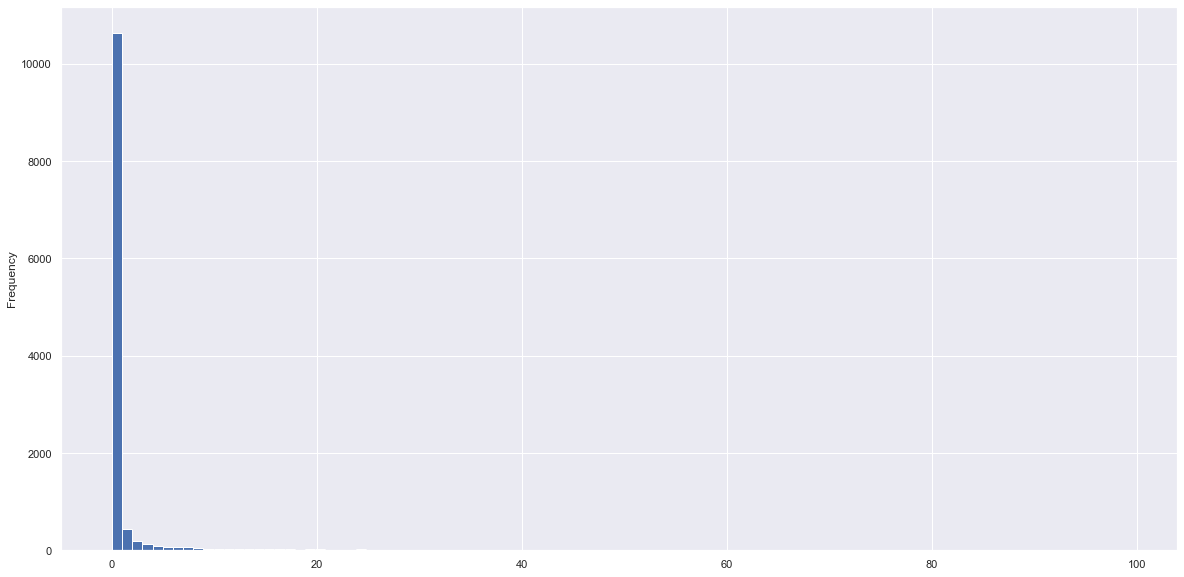

In [14]:
#построим распределение разностей дат
events_dates.delta_1[events_dates['delta_1'] < 100].plot.hist(bins=100)

In [15]:
# заполним все, что больше 90 дней на Nan
events_dates.delta_1[events_dates.delta_1 >= 90] = np.nan
events_dates.delta_2[events_dates.delta_2 >= 90] = np.nan
events_dates.delta_3[events_dates.delta_3 >= 90] = np.nan

Удалим ненужные столбцы, заполним пропуски

In [16]:
events_dates = events_dates.drop(['Edate_1', 'Edate_2', 'Edate_3',
                                  'Sdate_1', 'Sdate_2', 'Sdate_3',
                                  'delta_2', 'delta_3'], axis=1)

In [17]:
#сделаем переименование столбца
events_dates = events_dates.rename(columns={'delta_1': 'time_diff'})

In [18]:
#заполним пропуски
events_dates = events_dates.fillna(-1000)

Расчитаем относительную разность дат

In [19]:
#словарь {разность дней: количество пользователей, имеющих такую разность} 
Ni = Counter(events_dates.time_diff)

In [20]:
events_dates['time_ratio'] = 0# создаем новый столбец, сразу изменим тип
events_dates.time_ratio = events_dates.time_ratio.astype('float')

In [21]:
N = events_dates.time_diff.count()# Общее количество

In [22]:
# Заполняем относительными частотами
for i in range(len(events_dates)):
    events_dates.time_ratio[i] = (Ni.get(events_dates.time_diff[i])) / (N)

Сохраним результаты в файл:

In [23]:
events_dates.to_csv('DATA\\daysdiff_ratio.csv', index=False)

In [24]:
events_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25418 entries, 0 to 25417
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     25418 non-null  int64  
 1   time_diff   25418 non-null  float64
 2   time_ratio  25418 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.8 MB


In [25]:
events_dates

,user_id,time_diff,time_ratio
0,1,-1000.0,0.509914
1,2,0.0,0.418798
2,3,0.0,0.418798
3,4,-1000.0,0.509914
4,5,-1000.0,0.509914
...,...,...,...
25413,26796,17.0,0.000944
25414,26797,0.0,0.418798
25415,26798,0.0,0.418798
25416,26799,1.0,0.017625
